In [8]:
# Load the user_embeddings.pth matrix from Embeddings folder  and save it as a numpy matrix and to some analysis on it
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import argparse

def load_embeddings(embeddings_path):
    embeddings = torch.load(embeddings_path)
    return embeddings

def save_embeddings_as_numpy(embeddings, output_path):
    embeddings = embeddings.detach().cpu().numpy()
    np.save(output_path, embeddings)
    print(f"Embeddings saved to {output_path}")
    
def plot_embeddings(embeddings):
    
    embeddings = embeddings.detach().cpu().numpy()
    fig, ax = plt.subplots()
    ax.hist(embeddings.flatten(), bins=100)
    ax.set_title("Histogram of embeddings")
    ax.set_xlabel("Embedding values")
    ax.set_ylabel("Frequency")
    plt.show()
    
def tsne_embeddings(embeddings):
    from sklearn.manifold import TSNE
    embeddings = embeddings.detach().cpu().numpy()
    tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
    tsne_results = tsne.fit_transform(embeddings)
    return tsne_results

# def main():
#     parser = argparse.ArgumentParser(description='Load embeddings and save them as numpy matrix')
#     parser.add_argument('--embeddings_path', type=str, help='Path to the embeddings.pth file')
#     parser.add_argument('--output_path', type=str, help='Path to save the numpy matrix')
#     args = parser.parse_args()
#     embeddings = load_embeddings(args.embeddings_path)
#     save_embeddings_as_numpy(embeddings, args.output_path)
#     plot_embeddings(embeddings)
    
# if __name__ == "__main__":
#     main()
    
embeddings_path = "Embeddings/user_embeddings.pth"
output_path = "Embeddings/user_embeddings.npy"
embeddings = load_embeddings(embeddings_path)
save_embeddings_as_numpy(embeddings, output_path)
# plot_embeddings(embeddings)

# tsne_results = tsne_embeddings(embeddings)
# plt.scatter(tsne_results[:,0], tsne_results[:,1])
# plt.title("TSNE of embeddings")
# plt.show()



Embeddings saved to Embeddings/user_embeddings.npy


/raid/home/gnaneswaras/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6041 samples in 0.001s...
[t-SNE] Computed neighbors for 6041 samples in 3.300s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6041
[t-SNE] Computed conditional probabilities for sample 2000 / 6041
[t-SNE] Computed conditional probabilities for sample 3000 / 6041
[t-SNE] Computed conditional probabilities for sample 4000 / 6041
[t-SNE] Computed conditional probabilities for sample 5000 / 6041
[t-SNE] Computed conditional probabilities for sample 6000 / 6041
[t-SNE] Computed conditional probabilities for sample 6041 / 6041
[t-SNE] Mean sigma: 1.952273
[t-SNE] KL divergence after 250 iterations with early exaggeration: 104.952049
[t-SNE] KL divergence after 300 iterations: 5.688539


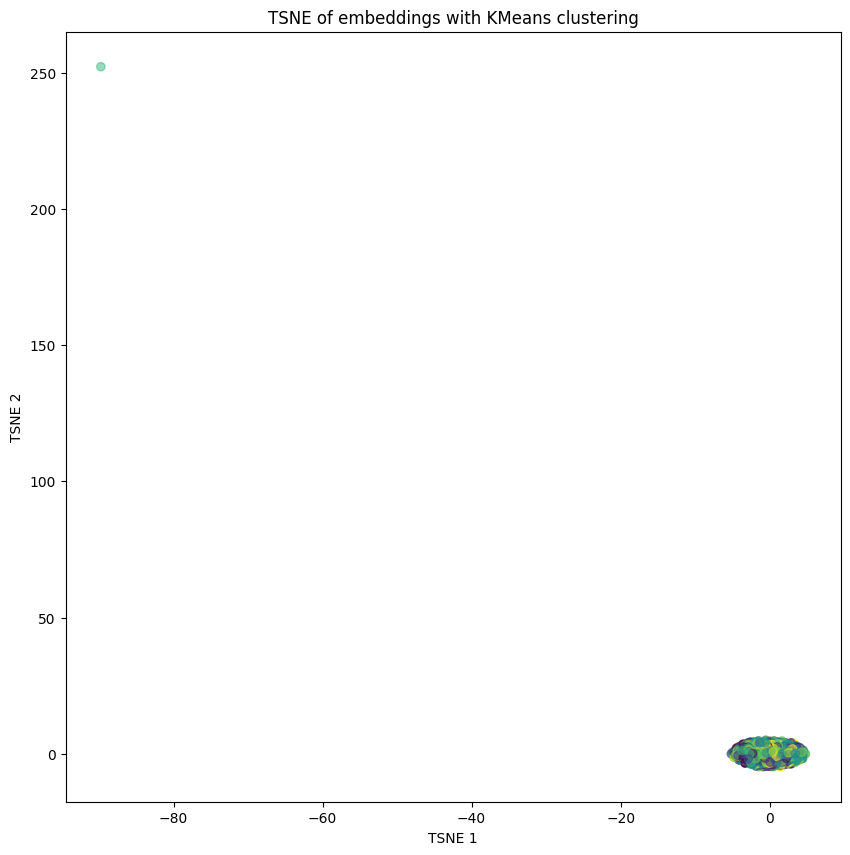

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(embeddings.detach().cpu().numpy())
tsne_results = tsne_embeddings(embeddings)
plt.figure(figsize=(10,10))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=kmeans.labels_, cmap='viridis',alpha=0.5)
plt.title("TSNE of embeddings with KMeans clustering")
plt.xlabel("TSNE 1")

plt.ylabel("TSNE 2")

plt.show()


In [12]:
from sklearn.metrics import silhouette_score
score = silhouette_score(embeddings.detach().cpu().numpy(), kmeans.labels_)
print(f"Silhouette score: {score}")

Silhouette score: 0.012619650922715664


In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
embeddings = embeddings.detach().cpu().numpy()
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, cluster_labels)
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {score}')


/raid/home/gnaneswaras/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 2, Silhouette Score: 0.015161230228841305


/raid/home/gnaneswaras/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 3, Silhouette Score: 0.013408548198640347


/raid/home/gnaneswaras/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 4, Silhouette Score: 0.012878045439720154


/raid/home/gnaneswaras/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 5, Silhouette Score: 0.012872636318206787


/raid/home/gnaneswaras/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 6, Silhouette Score: 0.012763277627527714


/raid/home/gnaneswaras/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 7, Silhouette Score: 0.012954643927514553


/raid/home/gnaneswaras/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 8, Silhouette Score: 0.012845638208091259


/raid/home/gnaneswaras/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 9, Silhouette Score: 0.013110015541315079


/raid/home/gnaneswaras/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 10, Silhouette Score: 0.013112172484397888
